In [1]:
import cv2
import imutils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
img = cv2.imread("test.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
%matplotlib inline

In [29]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [30]:
# lower_red = (0, 100, 100)
# upper_red = (20, 255, 255)

lower_red = (80, 70, 50)
upper_red = (100, 255, 255)

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
    
    
mask = cv2.inRange(hsv, light_orange, dark_orange)
# mask = cv2.erode(mask, None, iterations=2)
# mask = cv2.dilate(mask, None, iterations=2)
    
res = cv2.bitwise_and(img, img, mask=mask)
# cv2.imshow('frame', img)
# cv2.imshow('mask', mask)
# cv2.imshow('res', res)

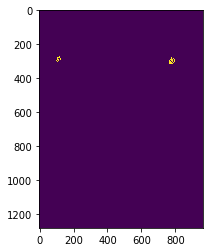

In [31]:
plt.imshow(mask)

In [32]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [33]:
len(cnts)

34

In [34]:
positions = {"x": [], "y": []}
for c in cnts: 
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    positions["x"].append(x)
    positions["y"].append(y)

In [35]:
positions

{'x': [153.0,
  150.5,
  723.0,
  719.0,
  160.5,
  736.0,
  148.0,
  719.0,
  142.5,
  163.5,
  153.5,
  147.0,
  134.0,
  737.0,
  144.0,
  143.0,
  144.0,
  144.5,
  158.0,
  155.0,
  128.0,
  128.0,
  116.0,
  109.0,
  130.0,
  112.0,
  112.0,
  131.0,
  111.5,
  128.0,
  119.5,
  772.9867553710938,
  109.0,
  114.5],
 'y': [752.0,
  752.0,
  745.5,
  744.0,
  744.5,
  743.0,
  743.0,
  741.0,
  742.5,
  740.5,
  740.5,
  740.5,
  736.5,
  731.0,
  730.0,
  718.0,
  715.0,
  709.5,
  703.0,
  703.0,
  305.5,
  303.0,
  304.5,
  302.0,
  301.5,
  301.0,
  290.0,
  289.0,
  299.5,
  288.0,
  292.0,
  298.8634338378906,
  276.0,
  286.0]}

In [36]:
y1 = int(min(positions["y"]))
y2 = int(max(positions["y"]))
x1 = int(min(positions["x"]))
x2 = int(max(positions["x"]))

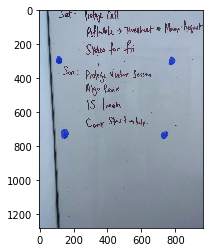

In [37]:
plt.imshow(img)

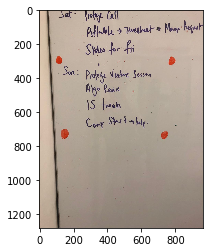

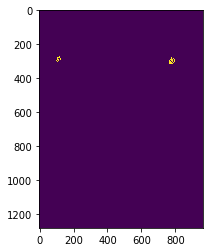

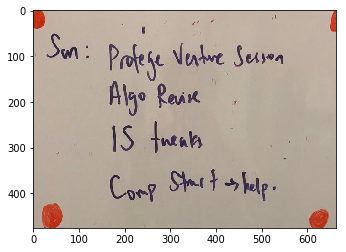

In [49]:
crop_img = img[y1:y2, x1:x2]
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(mask)
plt.figure()
# plt.imshow(img)
# plt.figure()
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

In [50]:
import png

In [59]:
cropped_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

from PIL import Image
im = Image.fromarray(cropped_img)
im.save("cropped_img.jpg")